In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [60]:
#cargar datos
#importamos a un dataframe

df = pd.read_csv(r"C:\Users\ninic\OneDrive - Lambton College\Term 1\BDM 1113-NoSQL data Base\project\Project-Data-Analysis-Lambton\Electricity_Generation.csv", header=None, names=range(47))
#nombre de las tablas
table_names = ["Canada", "Newfoundland and Labrador", "Prince Edward Island", "Nova Scotia", "New Brunswick","Quebec", "Ontario","Manitoba", "Alberta", "British Columbia", "Saskatchewan", "Yukon", "Northwest Territories", "Nunavut"]
# Identificar grupos basados en los nombres de las tablas
groups = df[0].isin(table_names).cumsum()
# Crear un diccionario de DataFrames para cada tabla
tables = {g.iloc[0,0]: g.iloc[1:-1, :20] for k,g in df.groupby(groups)} 


#acomodar datos
#selecciono una sola region 
df2 = tables["Canada"]
#eliminar primera fila porque los anos estaban en esa fila
df2 = df2.iloc[1:, :]
#eliminar esa columna
df2.drop(df2.columns[0], axis=1, inplace=True)
# Renombrar las columnas del 2005 al 2023
nuevos_nombres = {str(anio): f'Titulo_{anio}' for anio in range(2005, 2024)}
# Asignar nuevos nombres a las columnas
df2.columns = nuevos_nombres
#reset index
df2 = df2.reset_index(drop=True)
#nuevos nombres index
ind_nombres = ["Hydro / Wave / Tidal", "Wind", "Biomass / Geothermal","Solar","Uranium","Coal & Coke","Natural Gas","Oil"]  
df2.rename(index=dict(enumerate(ind_nombres)), inplace=True)
#transponer matriz
dataset = df2.T
#cambiar los numeros a fecha
dataset.index = pd.to_datetime(dataset.index, format='%Y')
#seleccionamos que solo sea WIND y lo pasamos de serie a dataframe 
dataset=dataset["Wind"].to_frame()
print(type(dataset))
print(dataset)


<class 'pandas.core.frame.DataFrame'>
                Wind
2005-01-01   1453.41
2006-01-01   2529.41
2007-01-01   3683.41
2008-01-01   4715.44
2009-01-01   7031.23
2010-01-01   8354.23
2011-01-01  11622.99
2012-01-01  13716.78
2013-01-01  17544.74
2014-01-01  21484.50
2015-01-01  26692.57
2016-01-01  30624.00
2017-01-01  31197.00
2018-01-01  32814.01
2019-01-01  32333.00
2020-01-01  37454.07
2021-01-01  35996.13
2022-01-01  50816.97
2023-01-01  54408.92


C:\Users\ninic\AppData\Local\Temp\ipykernel_35440\1122791778.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2.columns[0], axis=1, inplace=True)


In [73]:
df3 = pd.DataFrame()

df3['Año'] = dataset.index.year
X = df3['Año'].values.reshape(-1, 1) - 2000  # Variable independiente
y = dataset['Wind'].values  # Variable dependiente

print(type(X))


<class 'numpy.ndarray'>


In [62]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_test)
#X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)

"""Después de esta operación, X_train_temp y y_train_temp contienen el 80% de los datos. Estos conjuntos temporales se dividirán nuevamente para crear los conjuntos de entrenamiento y validación.

A continuación, dividimos el 80% restante de los datos en conjuntos de entrenamiento y validación. Al usar test_size=0.25 en esta segunda división, estamos reservando el 25% del 80% original (o el 20% del total de datos) para validación. Esto nos deja con el siguiente reparto:

60% de los datos para entrenamiento (X_train, y_train),
20% de los datos para validación (X_val, y_val),
20% de los datos para prueba (X_test, y_test)."""

[[ 5]
 [10]
 [16]
 [ 6]]


'Después de esta operación, X_train_temp y y_train_temp contienen el 80% de los datos. Estos conjuntos temporales se dividirán nuevamente para crear los conjuntos de entrenamiento y validación.\n\nA continuación, dividimos el 80% restante de los datos en conjuntos de entrenamiento y validación. Al usar test_size=0.25 en esta segunda división, estamos reservando el 25% del 80% original (o el 20% del total de datos) para validación. Esto nos deja con el siguiente reparto:\n\n60% de los datos para entrenamiento (X_train, y_train),\n20% de los datos para validación (X_val, y_val),\n20% de los datos para prueba (X_test, y_test).'

In [63]:
# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_temp, y_train_temp)

LinearRegression()

In [75]:
#Evaluar el modelo
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'El error cuadrático medio (MSE) en el conjunto de prueba es: {mse_test}')





El error cuadrático medio (MSE) en el conjunto de prueba es: 19032924.80862906


In [84]:
#ajustes previos
#ajustar ano
df3['Año']=pd.to_datetime(df3['Año'], format='%Y')
#anos a graficar
anos_graficar = df3[df3['Año'] >= '2020-01-01']
print(len(anos_graficar))
#ajustar los valores de la lista segun anos
y_grafica = y[-len(anos_graficar):]
y_predict = model.predict(X)
y_predict_grafica = y_predict[-len(anos_graficar):]
print(len(y_predict_grafica))

4
4


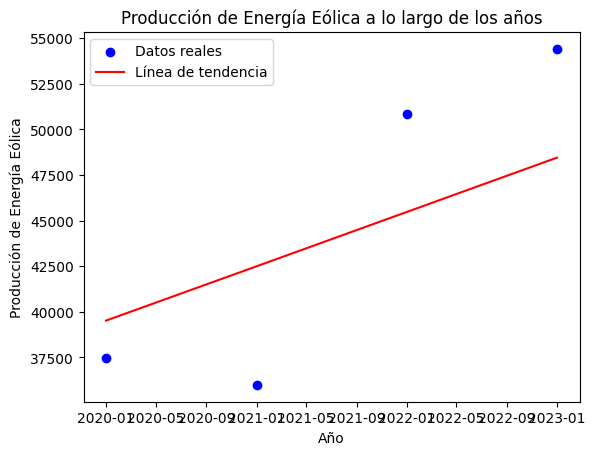

In [85]:
plt.scatter(anos_graficar,y_grafica, color='blue', label='Datos reales')
plt.plot(anos_graficar, y_predict_grafica, color='red', label='Línea de tendencia')
plt.xlabel('Año')
plt.ylabel('Producción de Energía Eólica')
plt.title('Producción de Energía Eólica a lo largo de los años')
plt.legend()
plt.show()